In [52]:
from scipy import stats
import pandas as pd
import os
import numpy as np
import wquantiles
from statsmodels import robust
import glob
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Use root for analysis, instead of notebooks folder. 
# WARNING: Only run this once!
print("Current WD:", os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Analysis WD:", os.getcwd())

Current WD: c:\Users\jeffc\source\repos\practical-stats-book\notebooks
Analysis WD: c:\Users\jeffc\source\repos\practical-stats-book


# Chapter 1: Exploratory Data Analysis
The first step of any data science project: exploring the data.

## Data Types
Numeric: 
- Continuous: can take any value in an interval (float)
- Discrete: integers

Categorical
- Binary: two values (T/F, 1/0)
- Ordinal: has ordering


## Rectangular Data
- Data Frame: ie - a spreadsheet
- Feature: a column
- Outcome: ie - dependent variable, response, target, output
- Records: row within a table

## Non-Rectangular Data
- Graphs (connected data)
- JSON (nested data)
- Time Series
- Spatial data (maps)

## Estimates of location
- Mean
- Weighted Mean
- Median
- Percentile
- Weighted Median
- Trimmed Mean
- Robust
- Outlier

In [27]:
# Trimmed Mean
df = pd.concat(map(pd.read_csv, glob.glob('data/raw/jobspostings-*.csv')))
df["wageavg"] = df.apply(lambda x: tryConvertFloat(str(x["wageavg"]).replace(" /yr (est.)", "").replace("$", "").replace(",","")), axis=1)
print("Mean:,",df["companyrating"].mean())

print("Trimmed Mean (10%):", stats.trim_mean(df["companyrating"], 0.1))

print("Median:", df["companyrating"].median())


Mean:, 3.71037037037037
Trimmed Mean (10%): 3.8704166666666664
Median: 3.9


In [4]:
# Weighted Mean & Median
df["companyratings"] = df.apply(lambda x: float(str(x["companyratings"]).replace(" Ratings", "").replace(" Rating", "")), axis=1)
df = df[df["companyratings"].notnull()]
print("Weighted Average (by # ratings):", np.average(df["companyrating"], weights=df["companyratings"]))
print("Weighted Median (by # ratings):", wquantiles.median(df["companyrating"], weights=df["companyratings"]))

Weighted Average (by # ratings): nan
Weighted Median (by # ratings): 3.9


## Estimates of Variability
- Deviations (differences between actual values and estimated values - aka "errors", "residuals")
- Variance (sum of squared deviations divided by n-1 - aka "mean squared error")
- Standard Deviation (square root of variance)
- Mean Absolute Deviation (mean of the absolute values from the deviations from the mean - aka "l1-norm", "manhattan norm")
- Median absolute deviation (the median of the absolute values from the deviations from the median)
- Range (difference from min to max)
- Order Statistics (metrics based on sorting values - ie: ranks)
- Percentile (The value such that P percent of the values take on this value or less and 100-P percent take on this value or more - aka "quantile")
- Interquartile Range (difference from 75th percentile to 25th percentile - aka "IQR")

In [5]:
# Standard Deviation
print("Variance:", df["companyrating"].var())
print("Standard Deviation:", df["companyrating"].std())

# Percentiles
print("Percentile (80th):", df["companyrating"].quantile(0.80))
print("Percentile (70th):", df["companyrating"].quantile(0.70))
print("Percentile (60th):", df["companyrating"].quantile(0.60))
print("Percentile (50th):", df["companyrating"].quantile(0.50))
print("Percentile (40th):", df["companyrating"].quantile(0.40))
print("Percentile (30th):" , df["companyrating"].quantile(0.30))
print("Percentile (20th):", df["companyrating"].quantile(0.20))

# Interquartile Range
print("IQR: ", df["companyrating"].quantile(0.75) - df["companyrating"].quantile(0.25))

# median absolute deviation from the median (MAD)
print("MAD:", robust.scale.mad(df["companyrating"]))

Variance: 0.42144980085153144
Standard Deviation: 0.6491916518652496
Percentile (80th): 4.2
Percentile (70th): 4.1
Percentile (60th): 4.0
Percentile (50th): 3.9
Percentile (40th): 3.7
Percentile (30th): 3.4
Percentile (20th): 3.2
IQR:  0.7999999999999998
MAD: nan


## Exploring the Data Distribution
- Boxplot (aka "box and whiskers plot")
- Frequency Table (count of values that fall within bins)
- Histogram (plot of frequency table, with bins on x-axis and the count on the y-axis)
- Density Plot (smoothed histogram)

Quantiles...
0.05    2.4
0.25    3.3
0.50    3.9
0.75    4.1
0.95    4.6
Name: companyrating, dtype: float64
                               companyname  companyrating  companyratings
3   New York City Department of Correction            2.3             7.0
4           Helene Fuld College of Nursing            2.4             0.0
5                    Care for the Homeless            2.4            10.0
15                                  MIRROR            2.0             0.0


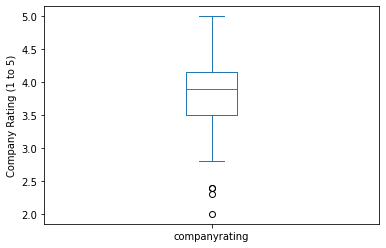

In [6]:
print("Quantiles...")
print(df["companyrating"].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
crs = df[["companyname", "companyrating", "companyratings"]].drop_duplicates().dropna()

# Box Plot
ax = (crs["companyrating"]).plot.box()
ax.set_ylabel("Company Rating (1 to 5)")

print(crs[crs["companyrating"] <= 2.4])



In [7]:
# Frequency Table
binned = pd.cut(crs["companyrating"], 10)
binned.value_counts()

(3.8, 4.1]      28
(3.5, 3.8]      18
(4.1, 4.4]      17
(3.2, 3.5]      16
(2.9, 3.2]       8
(4.4, 4.7]       6
(2.6, 2.9]       3
(4.7, 5.0]       3
(1.997, 2.3]     2
(2.3, 2.6]       2
Name: companyrating, dtype: int64

Text(0.5, 0, 'Company Rating')

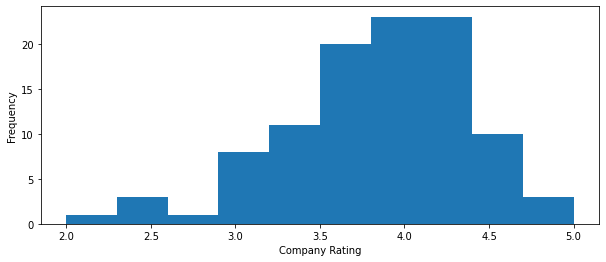

In [8]:
# Histogram
ax2 = crs["companyrating"].plot.hist(figsize=(10,4))
ax2.set_xlabel("Company Rating")

Text(0.5, 3.1999999999999993, 'Company Rating')

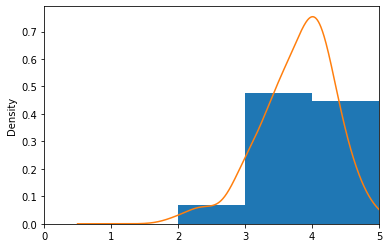

In [9]:
# Density Plot
ax3 = crs["companyrating"].plot.hist(density=True, xlim=[0,5], bins=range(1,12))
crs["companyrating"].plot.density(ax=ax3)
ax.set_xlabel("Company Rating")

# Exploring Binary and Categorical Data
- Mode (most commonly occurring category)
- Expected Value
- Bar Charts
- Pie Charts

In [10]:
sizes = df[["companyname", "companysize"]].drop_duplicates().dropna()
sizes = sizes.groupby(["companysize"]).count()
sizes.reset_index(level=[0], inplace=True)
sizes

,companysize,companyname
0,1 to 50 Employees,15
1,10000+ Employees,26
2,1001 to 5000 Employees,19
3,201 to 500 Employees,9
4,5001 to 10000 Employees,8
5,501 to 1000 Employees,10
6,51 to 200 Employees,13
7,Unknown,1


Text(0, 0.5, 'Count')

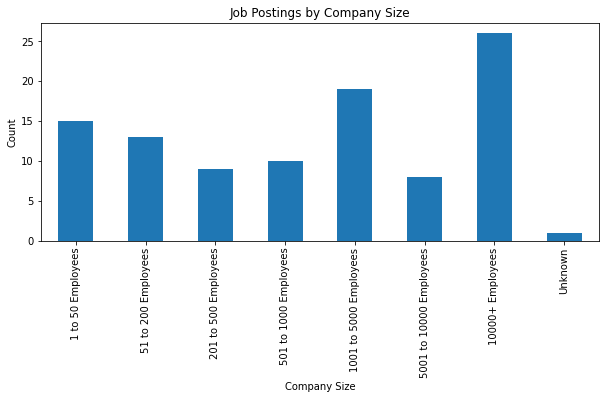

In [11]:
axisorder = ['1 to 50 Employees', '51 to 200 Employees', '201 to 500 Employees', 
    '501 to 1000 Employees', '1001 to 5000 Employees', '5001 to 10000 Employees', 
    '10000+ Employees', 'Unknown']
ax4 = sizes.set_index("companysize").loc[axisorder].plot.bar(figsize=(10,4), legend=False)
ax4.set_title("Job Postings by Company Size")
ax4.set_xlabel("Company Size")
ax4.set_ylabel("Count")

# Correlation
EDA often contains modeling data in some way, so you should find out how your predictors correlate with your target.
- Correlation Coefficient (A metrics that measures the extent to which numeric variables are associated with one another - ie: from -1 (perfectly uncorrelated) to 1 (perfectly correlated))
- Correlation Matrix (A table of all variables in both row and columns, with the correlation value in each cell)
- Scatterpot (x and y axis have two separate variables)

In [28]:
def tryConvertFloat(st):
    try:
        return float(st)
    except:
        return np.nan

corr = df[["companyname", "jobtitle", "companyrating", "companyratings", "wageavg"]].drop_duplicates()
corr = corr.dropna()
corr

,companyname,jobtitle,companyrating,companyratings,wageavg
1,Datalot,Data Analyst,3.5,10 Ratings,60237.0
4,Helene Fuld College of Nursing,Institutional Research Analyst,2.4,0 Ratings,64959.0
5,Care for the Homeless,Data Analyst,2.4,10 Ratings,62225.0
9,Fora Financial LLC,QA Analyst,3.2,42 Ratings,79177.0
10,Dow Jones,Data Analyst,3.8,74 Ratings,70428.0
...,...,...,...,...,...
21,Aquent,Analyst,4.3,206 Ratings,71631.0
26,WebMD,Data Analyst,3.3,127 Ratings,65598.0
27,adMarketplace,Data Analyst,3.3,156 Ratings,80932.0
28,Google,"Data Analytics Program Manager, Google Career ...",4.5,5051 Ratings,131543.0


<AxesSubplot:>

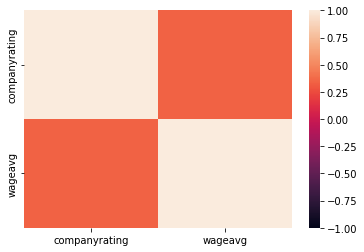

In [29]:
sns.heatmap(corr.corr(), vmin=-1, vmax=1)

# Exploring 2 or more variables
- Scatterplot
- Contingency Table
- Hexagonal Binning
- Contour Plot
- Violin Plot
- Facet Grid

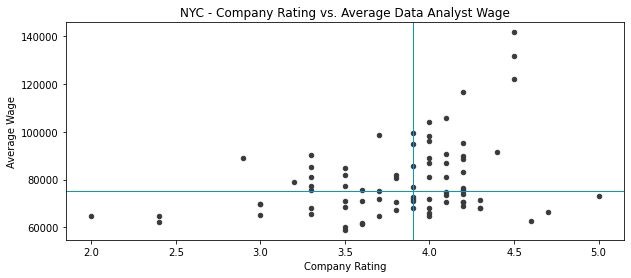

In [14]:
# Scatterplot
ax5 = corr.plot.scatter(x="companyrating", y="wageavg", figsize=(10,4), color="#3a3a3c")
ax5.set_title("NYC - Company Rating vs. Average Data Analyst Wage")
ax5.set_xlabel("Company Rating")
ax5.set_ylabel("Average Wage")
ax5.axhline(corr["wageavg"].median(), color="#0099d8", lw=1)
ax5.axvline(corr["companyrating"].median(), color="#0099d8", lw=1)

In [15]:
valx = "companyrating"
valy = "wageavg"
def printQuarterVals(corr, valx, valy):
    print('Total: ', corr.shape[0])
    print('Top Right:', corr[(corr["wageavg"] >= corr["wageavg"].median()) & (corr["companyrating"] >= corr["companyrating"].median())].shape[0])
    print('Bottom Right:', corr[(corr["wageavg"] < corr["wageavg"].median()) & (corr["companyrating"] >= corr["companyrating"].median())].shape[0])
    print('Top Left:', corr[(corr["wageavg"] >= corr["wageavg"].median()) & (corr["companyrating"] < corr["companyrating"].median())].shape[0])
    print('Bottom Left:', corr[(corr["wageavg"] < corr["wageavg"].median()) & (corr["companyrating"] < corr["companyrating"].median())].shape[0])

printQuarterVals(corr, valx, valy)

Total:  81
Top Right: 26
Bottom Right: 21
Top Left: 15
Bottom Left: 19


In [16]:
print("highest rating:")
print(corr[corr["companyrating"]>4.7])

highest rating:
                companyname                jobtitle  companyrating  \
2  Chamberlain Advisors LLC  Data Migration Analyst            5.0   

   companyratings  wageavg  
2             0.0  73108.0  


Text(0, 0.5, 'Average Wage')

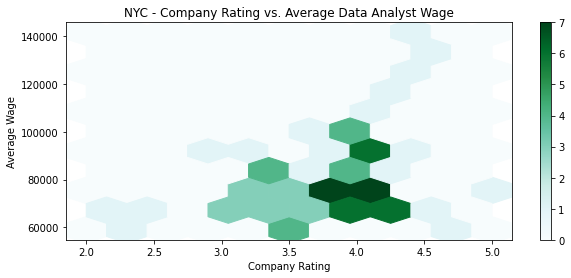

In [17]:
# Hex Bin
ax6 = corr.plot.hexbin(x="companyrating", y="wageavg", gridsize=10, sharex=False, figsize=(10,4))
ax6.set_title("NYC - Company Rating vs. Average Data Analyst Wage")
ax6.set_xlabel("Company Rating")
ax6.set_ylabel("Average Wage")

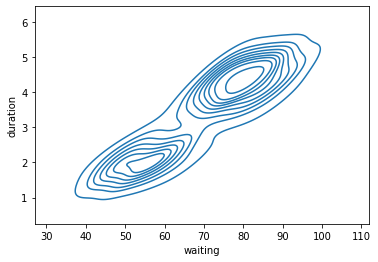

In [20]:
# Kernel density estimate (KDE) plot
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
geyser = sns.load_dataset("geyser")
ax7 = sns.kdeplot(data=geyser, x="waiting", y="duration")


In [23]:
# Contingency Table
# TODO: Bad example... haha
cont = df[["companyname", "companysize", "jobeasyapply"]].pivot_table(index="companyname", columns="jobeasyapply", aggfunc=lambda x: len(x), margins=True)
cont

companysize            
jobeasyapply                   False   True  All
companyname                                     
1199SEIU Family of Funds         4.0    NaN    4
AT&T                             1.0    NaN    1
Acacia Network                   NaN   13.0   13
Accenture                        1.0    NaN    1
Altice USA                       1.0    NaN    1
...                              ...    ...  ...
Zip Co                           1.0    NaN    1
adMarketplace                    1.0    NaN    1
eMoney Advisor                   1.0    NaN    1
the NBA                          2.0    NaN    2
All                            310.0  472.0  782

[102 rows x 3 columns]

[Text(0, 0, '1 to 50 Employees'),
 Text(1, 0, '51 to 200 Employees'),
 Text(2, 0, '201 to 500 Employees'),
 Text(3, 0, '501 to 1000 Employees'),
 Text(4, 0, '1001 to 5000 Employees'),
 Text(5, 0, '5001 to 10000 Employees'),
 Text(6, 0, '10000+ Employees'),
 Text(7, 0, 'Unknown')]

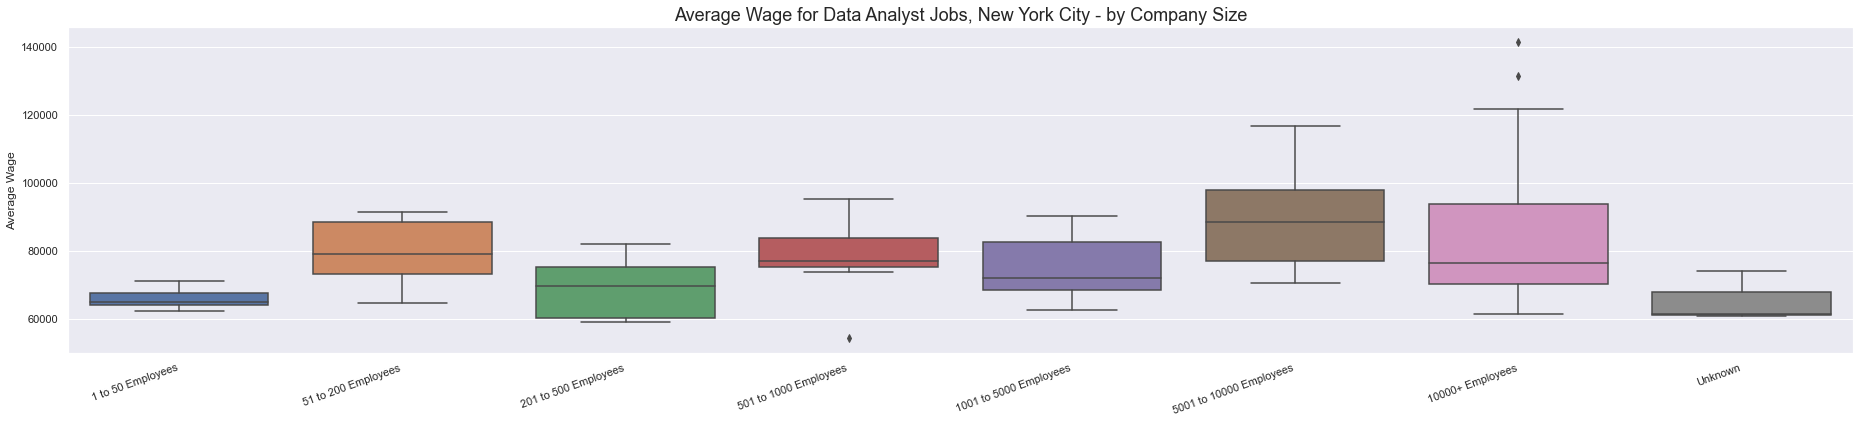

In [48]:
# Boxplot with multiple variables
axisorder = ['1 to 50 Employees', '51 to 200 Employees', '201 to 500 Employees', 
    '501 to 1000 Employees', '1001 to 5000 Employees', '5001 to 10000 Employees', 
    '10000+ Employees', 'Unknown']
    
sns.set(rc = {'figure.figsize':(32,6)})
ax8 = sns.boxplot(data=df[["companysize", "jobtitle", "wageavg"]].drop_duplicates(), x="companysize", y="wageavg", order=axisorder)
ax8.set_title("Average Wage for Data Analyst Jobs, New York City - by Company Size", size=18)
ax8.set_xlabel(None)
ax8.set_ylabel("Average Wage")
ax8.set_xticklabels(ax8.get_xticklabels(),rotation = 20, ha="right")

[Text(0, 0, '1 to 50 Employees'),
 Text(1, 0, '51 to 200 Employees'),
 Text(2, 0, '201 to 500 Employees'),
 Text(3, 0, '501 to 1000 Employees'),
 Text(4, 0, '1001 to 5000 Employees'),
 Text(5, 0, '5001 to 10000 Employees'),
 Text(6, 0, '10000+ Employees'),
 Text(7, 0, 'Unknown')]

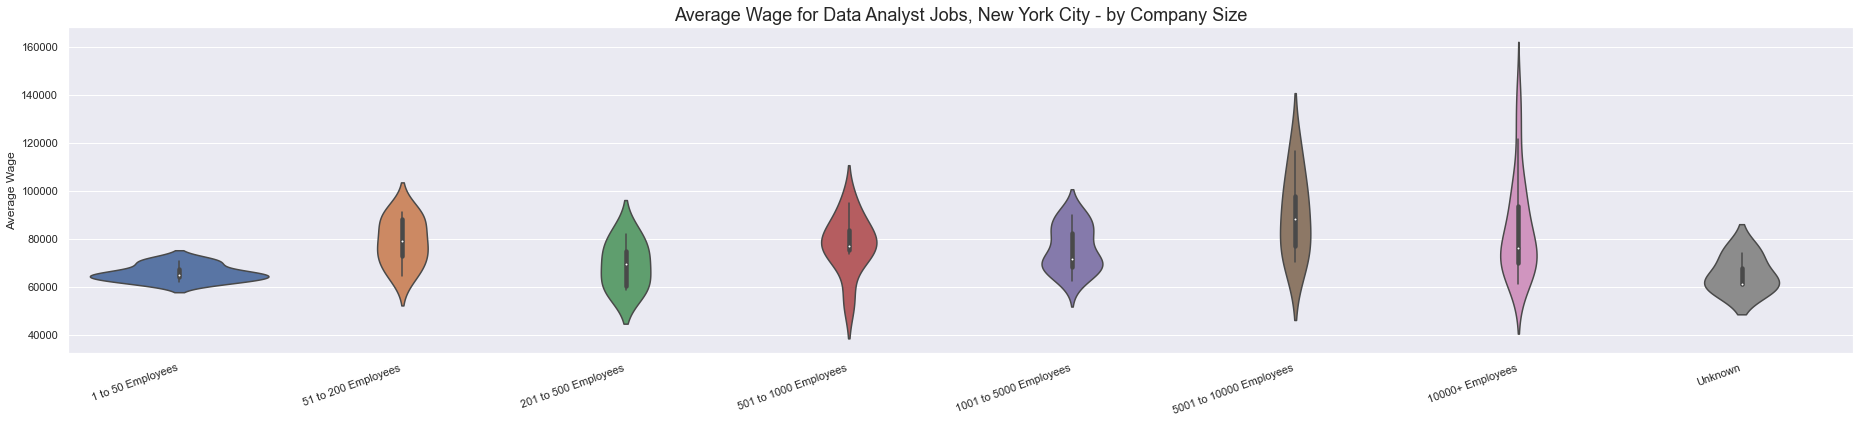

In [49]:
# Violin Plot
# Boxplot with multiple variables
axisorder = ['1 to 50 Employees', '51 to 200 Employees', '201 to 500 Employees', 
    '501 to 1000 Employees', '1001 to 5000 Employees', '5001 to 10000 Employees', 
    '10000+ Employees', 'Unknown']
    
sns.set(rc = {'figure.figsize':(32,6)})
ax9 = sns.violinplot(data=df[["companysize", "jobtitle", "wageavg"]].drop_duplicates(), x="companysize", y="wageavg", order=axisorder)
ax9.set_title("Average Wage for Data Analyst Jobs, New York City - by Company Size", size=18)
ax9.set_xlabel(None)
ax9.set_ylabel("Average Wage")
ax9.set_xticklabels(ax8.get_xticklabels(),rotation = 20, ha="right")

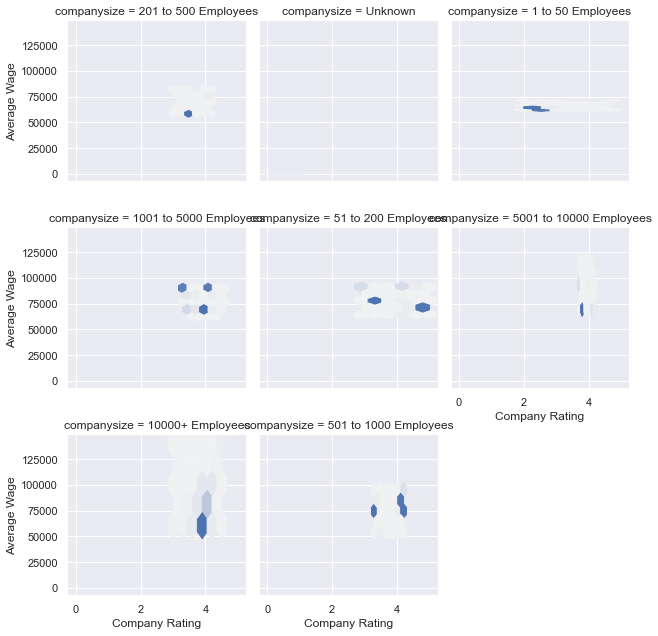

In [58]:
# Facet Grid
# TODO: hmm... this looks bad.
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x,y,gridsize=5,cmap=cmap, **kwargs)

sns.set(rc = {'figure.figsize':(32,6)})
ax10 = sns.FacetGrid(df, col="companysize", col_wrap=3)
ax10.map(hexbin, 'companyrating', 'wageavg')
ax10.set_xlabels("Company Rating")
ax10.set_ylabels("Average Wage")    